# Hyperopt: Space Configuration

One of the most valuable offers of Hyperopt is the flexibility it provides to create priors over the hyperparameters distributions.

Hyperopt offers:

* Multiple distributions
* Possibility to combine distributions
* Possibility to create nested spaces
* Multiple configuration ways including lists, dictionaries and tuples

### Distributions
Taken from hp documentation

* hp.choice: returns one of several options (suitable for categorical hyperparams)
* hp.randint: returns a random integer between 0 and an upper limit
* hp.uniform: returns a value uniformly between specified limits
* hp.quniform: Returns a value like round(uniform(low, high) / q) * q

hp.quniform would be an equivalent of randint (if q=1), but the upper and lower limits can be specified. hp.quniform also offers the possibility to use bigger values of q. So if we search for the optimal number of trees in a random forest, we could search hp.quniform('n_estimators', 10, 1000, 50), in which case we would sample between 10 and 1000 trees in increments of 50.

* hp.loguniform: draws values from exp(uniform(low, high)) so that the logarithm of the returned value is uniformly distributed
* hp.qloguniform: Returns a value like round(exp(uniform(low, high)) / q) * q (similar use and cautions to hp.quniform but for log-uniform distributions)
* hp.normal: draws from a normal distribution with specified mu and sigma
* hp.qnormal: Returns a value like round(normal(mu, sigma) / q) * q
* hp.lognormal: Returns a value drawn according to exp(normal(mu, sigma)) so that the logarithm of the return value is normally distributed
* hp.qlognormal: Returns a value like round(exp(normal(mu, sigma)) / q) * q
#### Important for q distributions
Another thing to notice is that q-distributions (qnormal, quniform, etc) return floats, where the value of the hyperparameter needs to be an integer (otherwise most models will return an error). Thus, some re-casting is necessary to pass this value to the models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hyperopt import hp
from hyperopt.pyll.stochastic import sample

## Distributions

### Numerical hyperparameters

In [2]:
# function to extract samples from the hyperparameter
# space and plot their distribution

def sample_and_plot(space, title):
    
    vals_ls = []
    
    for i in range(500):
        v = sample(space)
        v = v[0]['example']
        vals_ls.append(v)

    pd.Series(vals_ls).hist(bins=50)
    plt.title(title)
    plt.show()
    
    print('example values: ', vals_ls[0:5])

#### randint

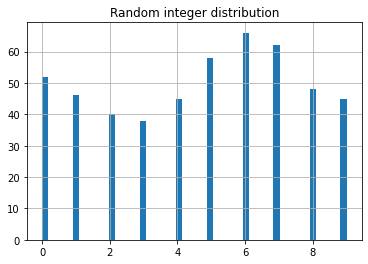

example values:  [array(8), array(5), array(5), array(4), array(6)]


In [3]:
# randint

space = [{'example' : hp.randint('example', 10)}]

sample_and_plot(space, 'Random integer distribution')

#### uniform

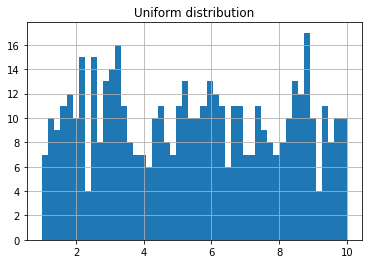

example values:  [3.0833098087686315, 7.603048614897185, 3.198912489161305, 7.773315885113242, 1.512406477416241]


In [4]:
# uniform

space = [{'example' : hp.uniform('example', 1, 10)}]

sample_and_plot(space, 'Uniform distribution')

#### quniform

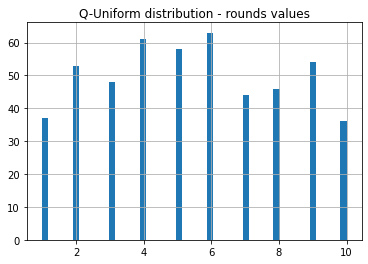

example values:  [9.0, 6.0, 9.0, 2.0, 6.0]


In [5]:
# quniform

space = [{'example' : hp.quniform('example', 1, 10, 1)}]

sample_and_plot(space, 'Q-Uniform distribution - rounds values')

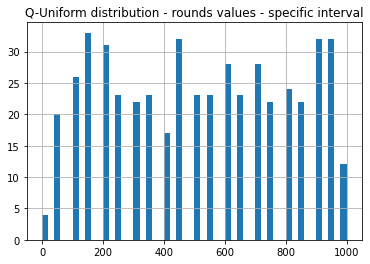

example values:  [450.0, 900.0, 500.0, 100.0, 200.0]


In [6]:
# with quniform we can change the limits (respect to randint)

space = [{'example' : hp.quniform('example', 10, 1000, 50)}]

sample_and_plot(space, 'Q-Uniform distribution - rounds values - specific interval')

#### loguniform

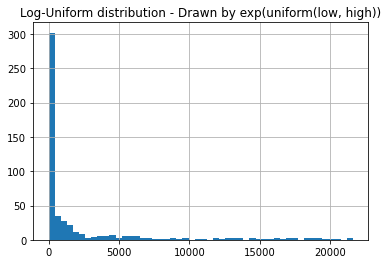

example values:  [22.94861223669294, 1783.8299914296776, 2269.635663934866, 65.23485206844484, 3782.2608403951294]


In [7]:
# loguniform

space = [{'example' : hp.loguniform('example', 1, 10)}]

sample_and_plot(space, 'Log-Uniform distribution - Drawn by exp(uniform(low, high))')

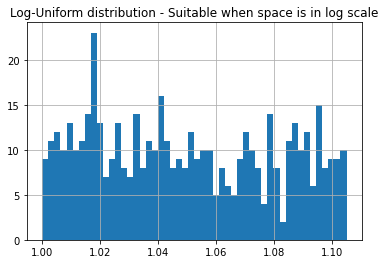

example values:  [1.0513464757262327, 1.037229073561932, 1.0510968745592015, 1.0640791999152623, 1.0233932431621129]


In [8]:
# Attention, the use of loguniform for floats < 1 is unintuitive
# (at least for me)

space = [{'example' : hp.loguniform('example', 0.000001, 0.1)}]

sample_and_plot(space, 'Log-Uniform distribution - Suitable when space is in log scale')

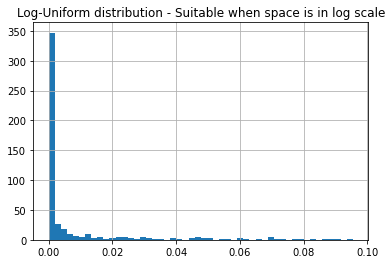

example values:  [4.133315864276267e-06, 2.8163430967425237e-05, 5.217295560031115e-06, 5.8542118129652066e-05, 1.3131229653650858e-05]


In [9]:
# if we want a log distribution over 0.000001, 0.1
# we need to enter it like this:

space = [{'example' : hp.loguniform('example', np.log(0.000001), np.log(0.1))}]

sample_and_plot(space, 'Log-Uniform distribution - Suitable when space is in log scale')

#### q log uniform

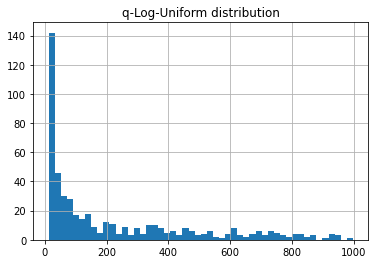

example values:  [66.50439109227848, 46.94427606513775, 332.5219554613924, 19.56011502714073, 500.7389446948027]


In [10]:
# qloguniform
# example we want to sample trees between 10 and 1000, in increments of 50
# but we think that better values are closer to smaller number of trees,
# so we want to sample more of those

space = [{'example': hp.qloguniform('example', np.log(10), np.log(1000), np.log(50))}]

sample_and_plot(space, 'q-Log-Uniform distribution')

#### normal

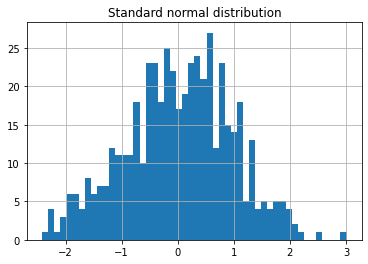

example values:  [-0.22929589060618535, 0.3810573170791083, -0.5869414770970601, -0.08394931903086984, 1.373001790403838]


In [11]:
# normal

# the standard normal
space = [{'example': hp.normal('example', 0, 1)}]

sample_and_plot(space, 'Standard normal distribution')

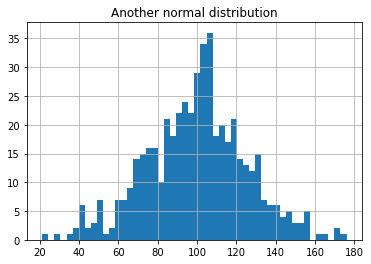

example values:  [107.69020418450347, 58.163726327825685, 70.29407236755041, 95.7155119585404, 93.84106673784235]


In [12]:
# normal

space = [{'example': hp.normal('example', 100, 25)}]

sample_and_plot(space, 'Another normal distribution')

#### q normal

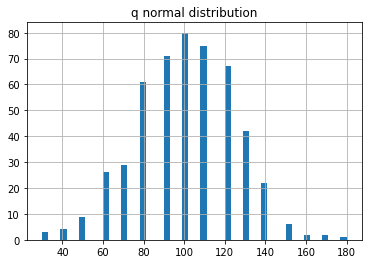

example values:  [90.0, 100.0, 70.0, 90.0, 90.0]


In [13]:
# qnormal
# same as previous but at discrete intervals

space = [{'example': hp.qnormal('example', 100, 25, 10)}]

sample_and_plot(space, 'q normal distribution')

#### log normal

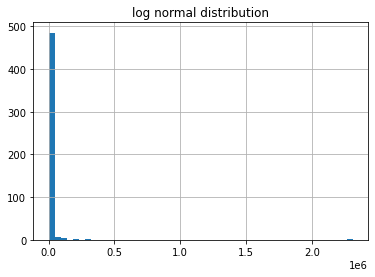

example values:  [815.431708366972, 24.860582008256035, 144.82568013986898, 282781.5058589891, 0.5294206281453295]


In [14]:
# lognormal

space = [{'example': hp.lognormal('example', np.log(100), np.log(25))}]

sample_and_plot(space, 'log normal distribution')

#### q log normal

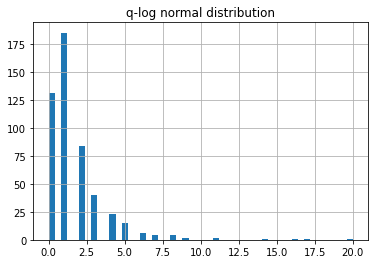

example values:  [0.0, 0.0, 1.0, 3.0, 0.0]


In [15]:
# q-lognormal

space = [{'example': hp.qlognormal('example', 0, 1, 1)}]

sample_and_plot(space, 'q-log normal distribution')

### Categorical hyperparameters

In [16]:
def sample_and_plot(space, title):
    
    vals_ls = []
    
    for i in range(500):
        v = sample(space)
        v = v[0]['example']
        vals_ls.append(v)

    pd.Series(vals_ls).value_counts().plot.bar()
    plt.title(title)
    plt.ylabel('Number of draws')
    plt.show()
    
    print('example values: ', vals_ls[0:5])

#### choice

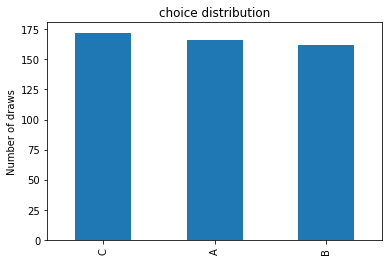

example values:  ['A', 'A', 'C', 'C', 'A']


In [17]:
# choice

space = [{'example': hp.choice('example', ['A', 'B', 'C'])}]

sample_and_plot(space, 'choice distribution')

#### pchoice

In [18]:
# pchoice

# example from the Hyperopt article

space = hp.pchoice('example', [
    (0.8, {'use_var': 'x', 'x': hp.normal('x', 0, 1)}),
    (0.2, {'use_var': 'y', 'y': hp.uniform('y', 1, 3)})])

In [19]:
# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'use_var': 'x', 'x': -1.0798580133956472}
{'use_var': 'x', 'x': 1.9172387442060874}
{'use_var': 'x', 'x': -1.9568560970438338}
{'use_var': 'x', 'x': -0.66692219581043}
{'use_var': 'x', 'x': -0.4376848422020798}
{'use_var': 'x', 'x': -0.3192476657219705}
{'use_var': 'x', 'x': -0.30606943963696037}
{'use_var': 'x', 'x': 0.6727960660108367}
{'use_var': 'x', 'x': 0.7057009952588308}
{'use_var': 'x', 'x': 0.9506032365477741}
{'use_var': 'y', 'y': 2.261460729727728}
{'use_var': 'y', 'y': 2.4353313346372665}
{'use_var': 'x', 'x': -1.3561734979082618}
{'use_var': 'x', 'x': -0.2105213514002388}
{'use_var': 'x', 'x': 0.6947621376395884}
{'use_var': 'x', 'x': 2.0681549369645373}
{'use_var': 'x', 'x': -0.4647813265796376}
{'use_var': 'y', 'y': 1.4835928609286633}
{'use_var': 'x', 'x': 0.8400537554354859}
{'use_var': 'x', 'x': 0.7796744255561601}


In [20]:
# our own example, realistic, 

# if we want to sample
# a loss function but think that deviance is likely better
# than exponential

space = hp.pchoice('example', [
    (0.8, {'loss': 'deviance'}),
    (0.2, {'loss': 'exponential'})])

# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'exponential'}
{'loss': 'deviance'}


In [21]:
# our own example, continuing from choice

space = hp.pchoice('example', [
    (0.8, {'use_var': 'x', 'x': hp.choice('a', ['A', 'B'])}),
    (0.2, {'use_var': 'y', 'y': hp.choice('a', ['C', 'D'])})])

In [22]:
# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'use_var': 'y', 'y': 'D'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'y', 'y': 'C'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'y', 'y': 'D'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}


In [23]:
# capture data in a dataframe

vals_ls = []
for i in range(500):
        v = sample(space)
        vals_ls.append(v)
        
v = pd.DataFrame(vals_ls)
v.head()

,use_var,x,y
0,x,A,NaN
1,x,B,NaN
2,x,B,NaN
3,x,A,NaN
4,x,B,NaN


In [24]:
v['use_var'].value_counts(normalize=True)

x    0.802
y    0.198
Name: use_var, dtype: float64

In [25]:
v['x'].value_counts(normalize=True, dropna=True)

A    0.503741
B    0.496259
Name: x, dtype: float64

In [26]:
v['x'].value_counts(normalize=True, dropna=False)

A      0.404
B      0.398
NaN    0.198
Name: x, dtype: float64

In [27]:
v['y'].value_counts(normalize=True)

C    0.525253
D    0.474747
Name: y, dtype: float64

In [28]:
v['y'].value_counts(normalize=True, dropna=False)

NaN    0.802
C      0.104
D      0.094
Name: y, dtype: float64

### Nested spaces

In [29]:
space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
    },
    {
        'type': 'svm',
        'C': hp.lognormal('svm_C', 0, 1),
        'kernel': hp.choice('svm_kernel', [
            {'ktype': 'linear'},
            {'ktype': 'RBF', 'width': hp.lognormal('svm_rbf_width', 0, 1)},
            ]),
    },
    {
        'type': 'dtree',
        'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
        'max_depth': hp.choice('dtree_max_depth',
            [None, hp.qlognormal('dtree_max_depth_int', 3, 1, 1)]),
        'min_samples_split': hp.qlognormal('dtree_min_samples_split', 2, 1, 1),
    },
    ])

In [30]:
for i in range(20):
        v = sample(space)
        print(v)
        print()

{'criterion': 'entropy', 'max_depth': 9.0, 'min_samples_split': 2.0, 'type': 'dtree'}

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5.0, 'type': 'dtree'}

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 33.0, 'type': 'dtree'}

{'type': 'naive_bayes'}

{'C': 2.07510051909114, 'kernel': {'ktype': 'RBF', 'width': 0.8648054663559743}, 'type': 'svm'}

{'criterion': 'entropy', 'max_depth': 8.0, 'min_samples_split': 2.0, 'type': 'dtree'}

{'type': 'naive_bayes'}

{'type': 'naive_bayes'}

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 14.0, 'type': 'dtree'}

{'criterion': 'entropy', 'max_depth': 271.0, 'min_samples_split': 6.0, 'type': 'dtree'}

{'type': 'naive_bayes'}

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 15.0, 'type': 'dtree'}

{'type': 'naive_bayes'}

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 8.0, 'type': 'dtree'}

{'criterion': 'gini', 'max_depth': 20.0, 'min_samples_split': 14.0, 'type': 'd